# Chapter 10: How to build a helpful histogram

For additional context see chapter 10 of [The Virus of Variation & Process Behavior Charts: A Guide for the Perplexed](https://www.brokenquality.com/book).

In [2]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

%matplotlib inline

## Get data

In [3]:
# Dataset URL
dataset_url = r'https://raw.githubusercontent.com/jimlehner/the-virus-of-variation-and-pbcs/refs/heads/main/data/09-vienna-general-dublin-maternity-death-to-birth-ratios-data.csv'

# Get data
def get_data() -> pd.DataFrame:
    return pd.read_csv(dataset_url)

# Get data
df = get_data()

# Drop 'Note' column
df.drop(columns='Note')
# Make 'Year' column dtype string
df['Year'] = df['Year'].astype('string')

# Show head of df
df.head()

,Hospital,Year,Births,Deaths,Death-to-Birth Ratio,Note
0,Vienna General Hospital,1784,284,6,2.1,No pathological anatomy
1,Vienna General Hospital,1785,899,13,1.4,NaN
2,Vienna General Hospital,1786,1151,5,0.4,NaN
3,Vienna General Hospital,1787,1407,5,0.4,NaN
4,Vienna General Hospital,1788,1425,5,0.4,NaN


## Split dataframe by hospital

In [4]:
# Split dataframe into Vienna General (vg) and Dublin General (dg)
vg_df = df[df['Hospital'] == 'Vienna General Hospital']
dg_df = df[df['Hospital'] == 'Dublin Maternity Hospital']

In [5]:
# Create list of hospitals
df['Hospital'].unique().tolist()

['Vienna General Hospital', 'Dublin Maternity Hospital']

## Fig 10.1: Histogram of Vienna General ratios

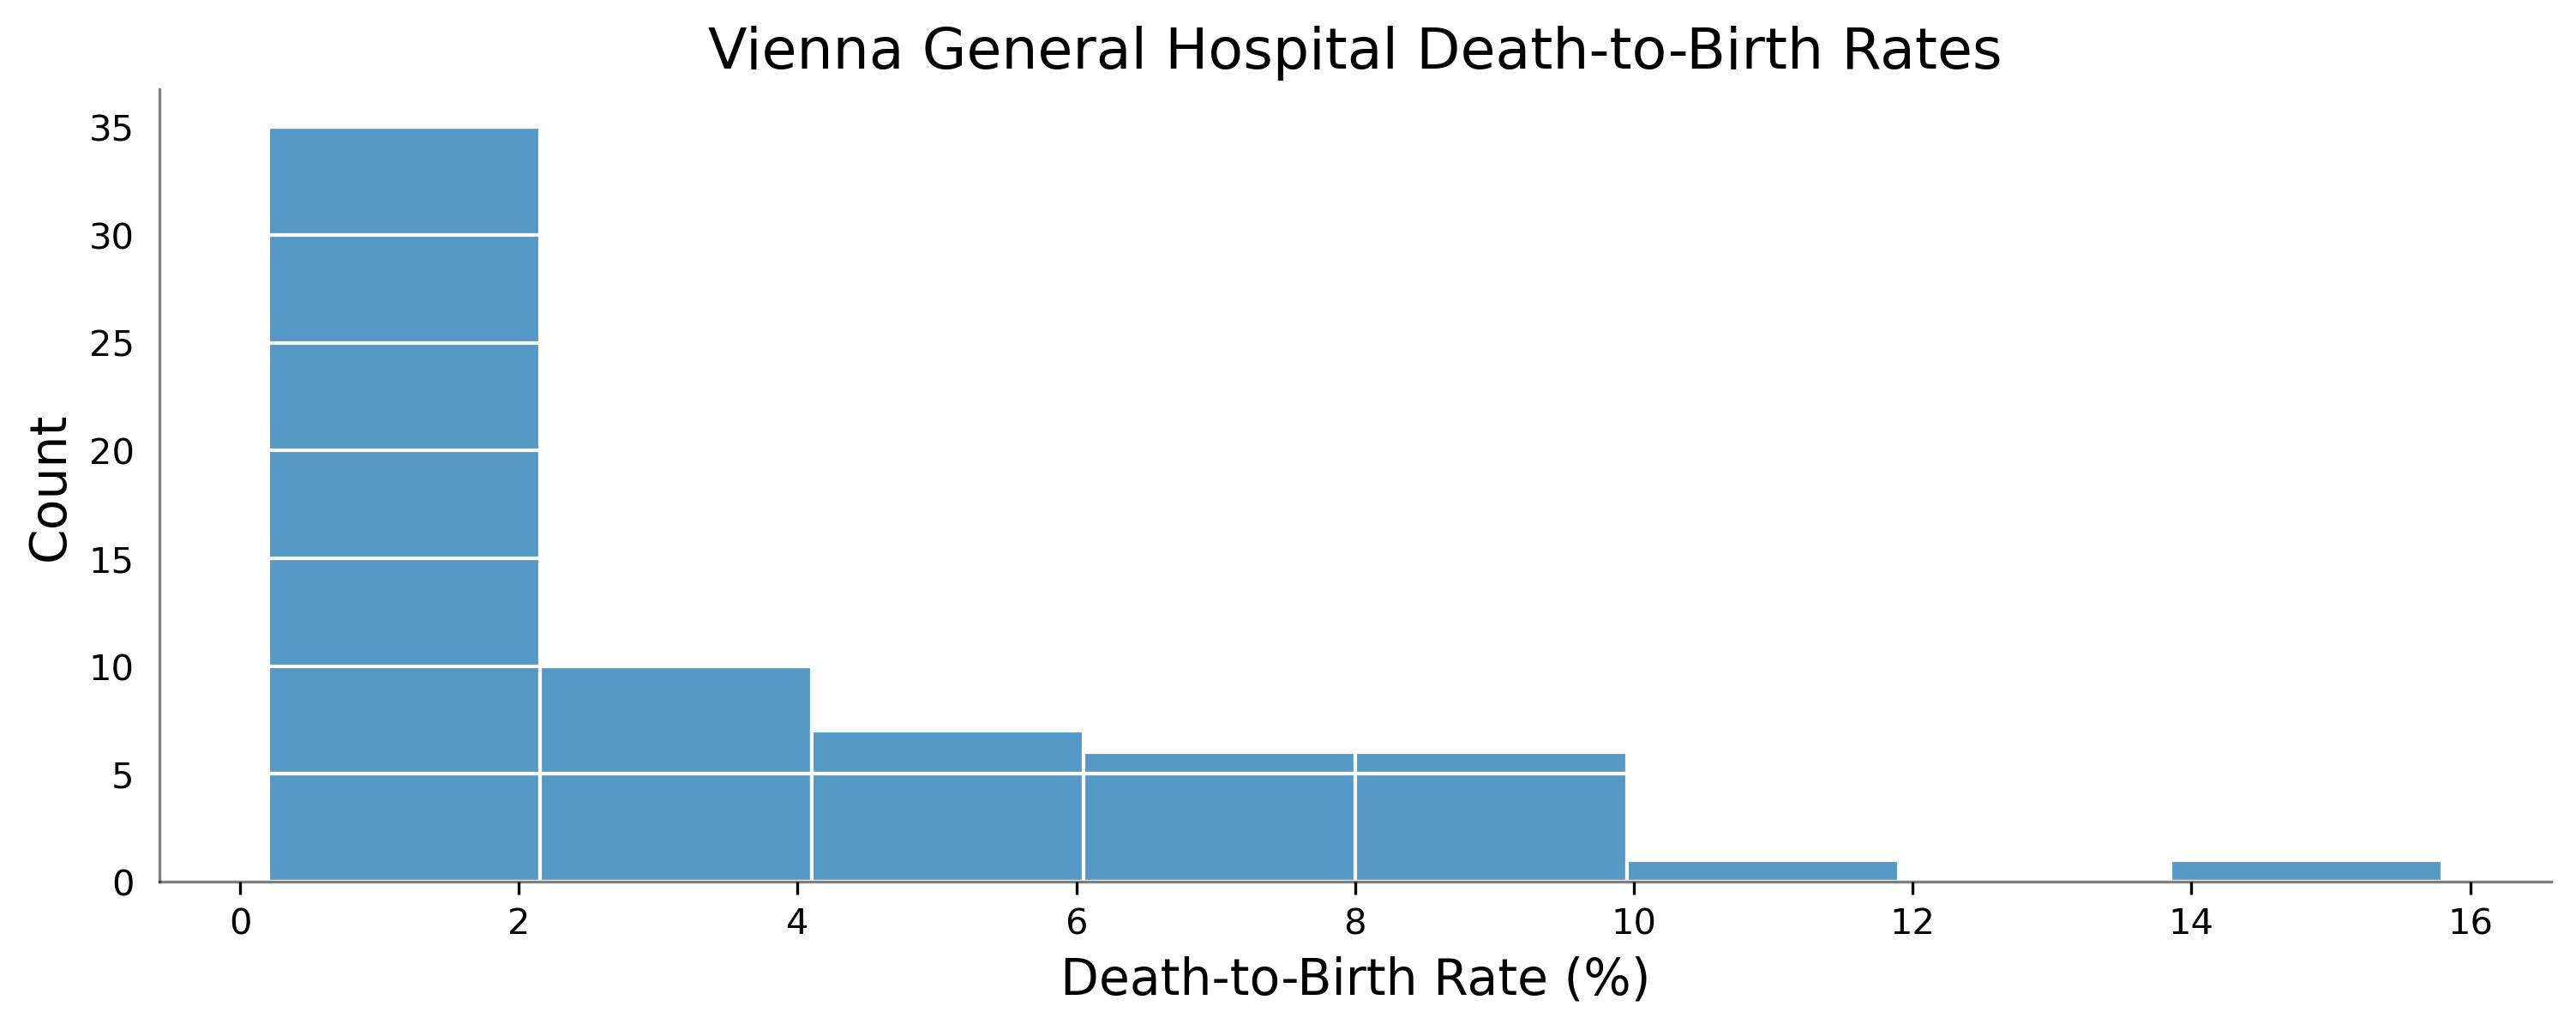

In [6]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histogram with bins='auto'
histplot = sns.histplot(vg_df['Death-to-Birth Ratio'], 
                        bins='auto', 
                        edgecolor='white')

# Specify x Label and y label
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add title
plt.title('Vienna General Hospital Death-to-Birth Rates', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Additional formatting
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Modified tick intervals for histogram

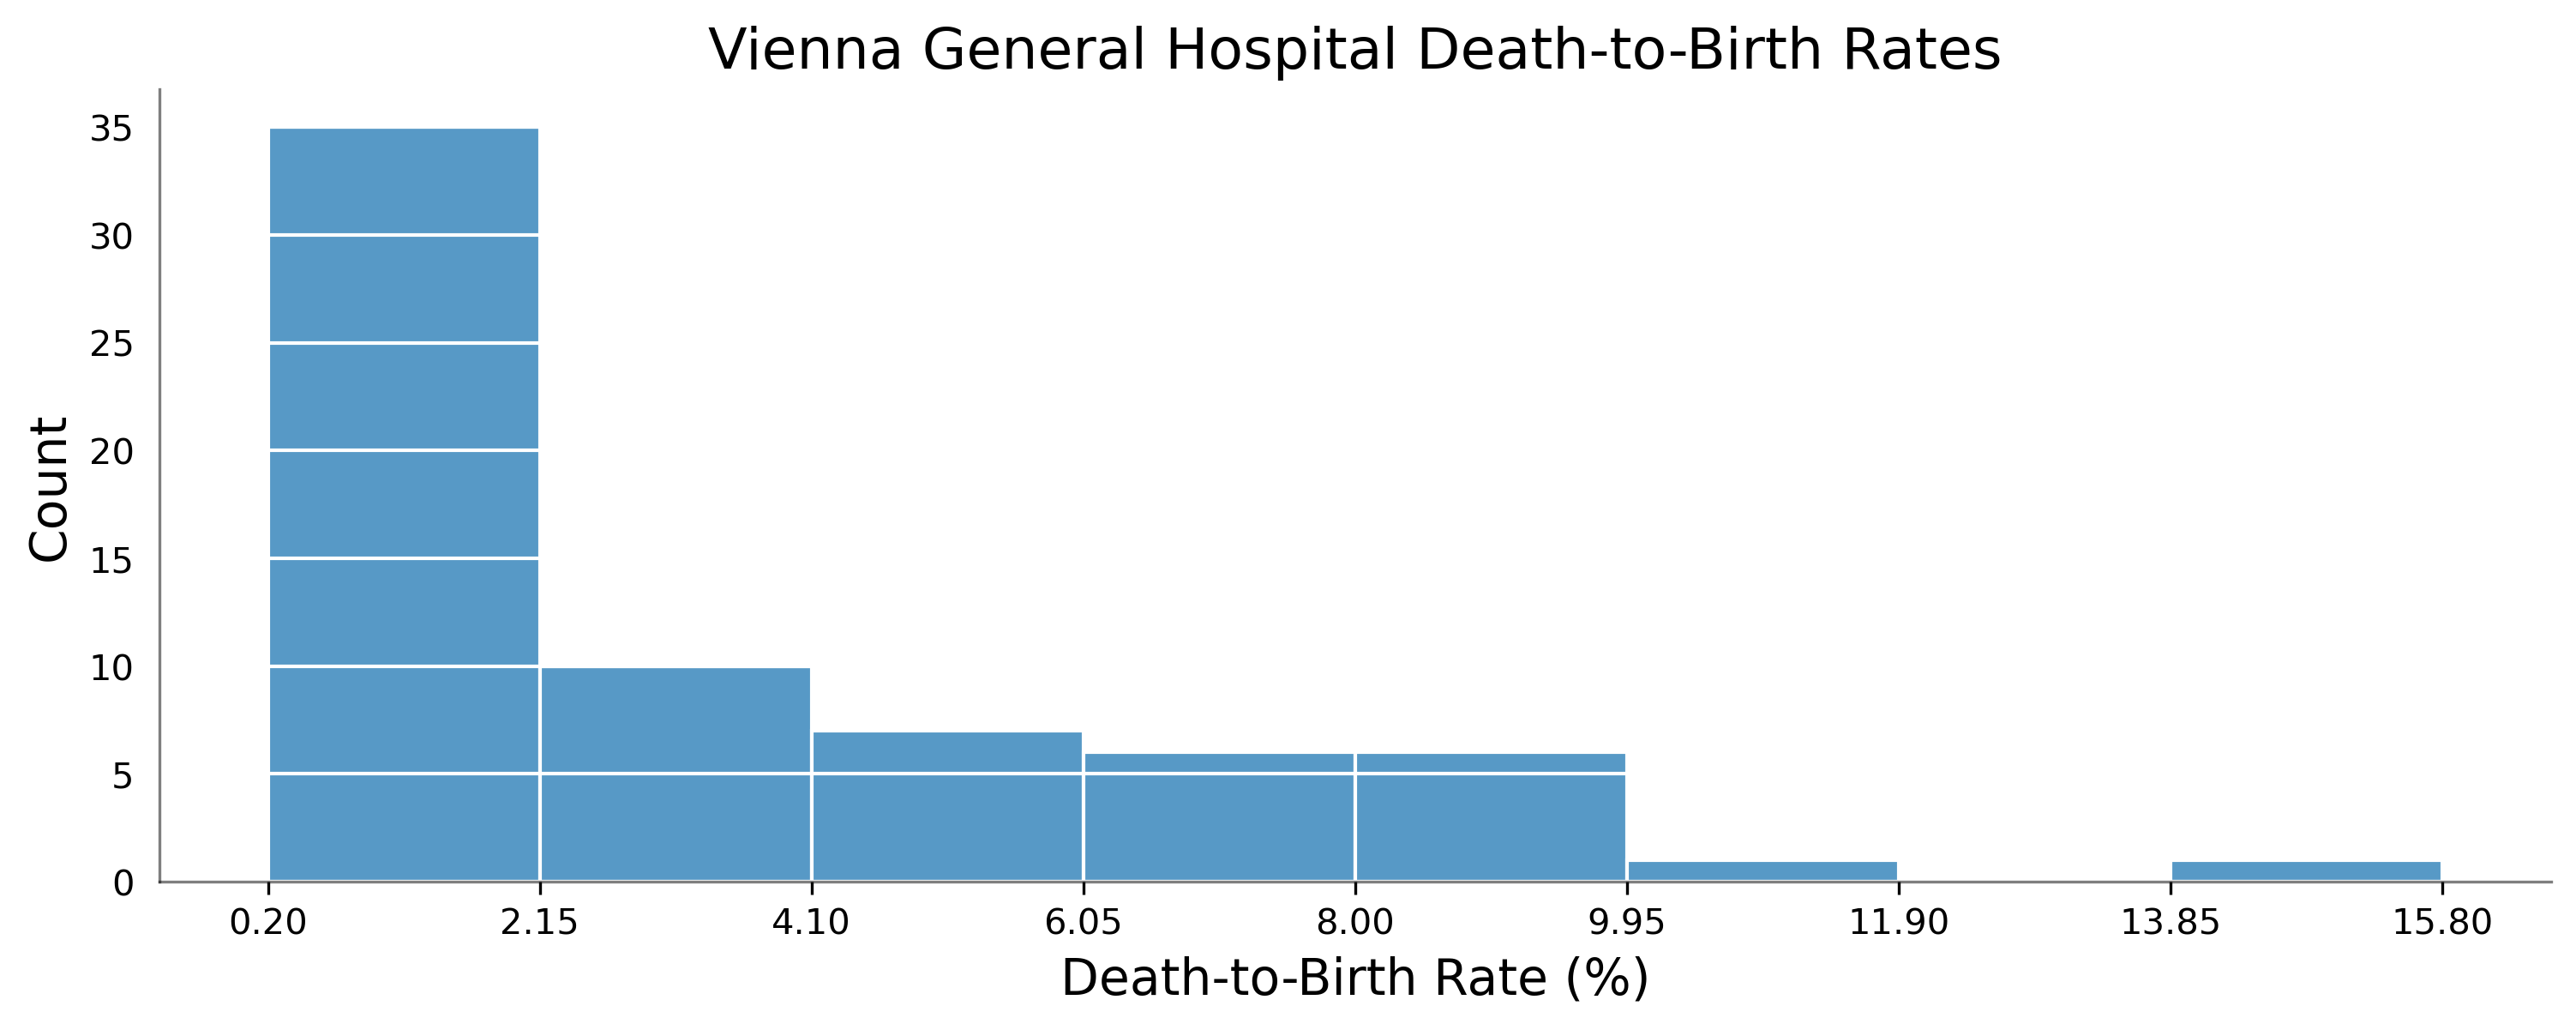

In [7]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histogram with bins='auto'
histplot = sns.histplot(vg_df['Death-to-Birth Ratio'], 
                        bins='auto', 
                        edgecolor='white')

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Specify x Label and y label
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add title
plt.title('Vienna General Hospital Death-to-Birth Rates', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Additional formatting
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Show plot
plt.show()

## Modified to reflect bin midpoints

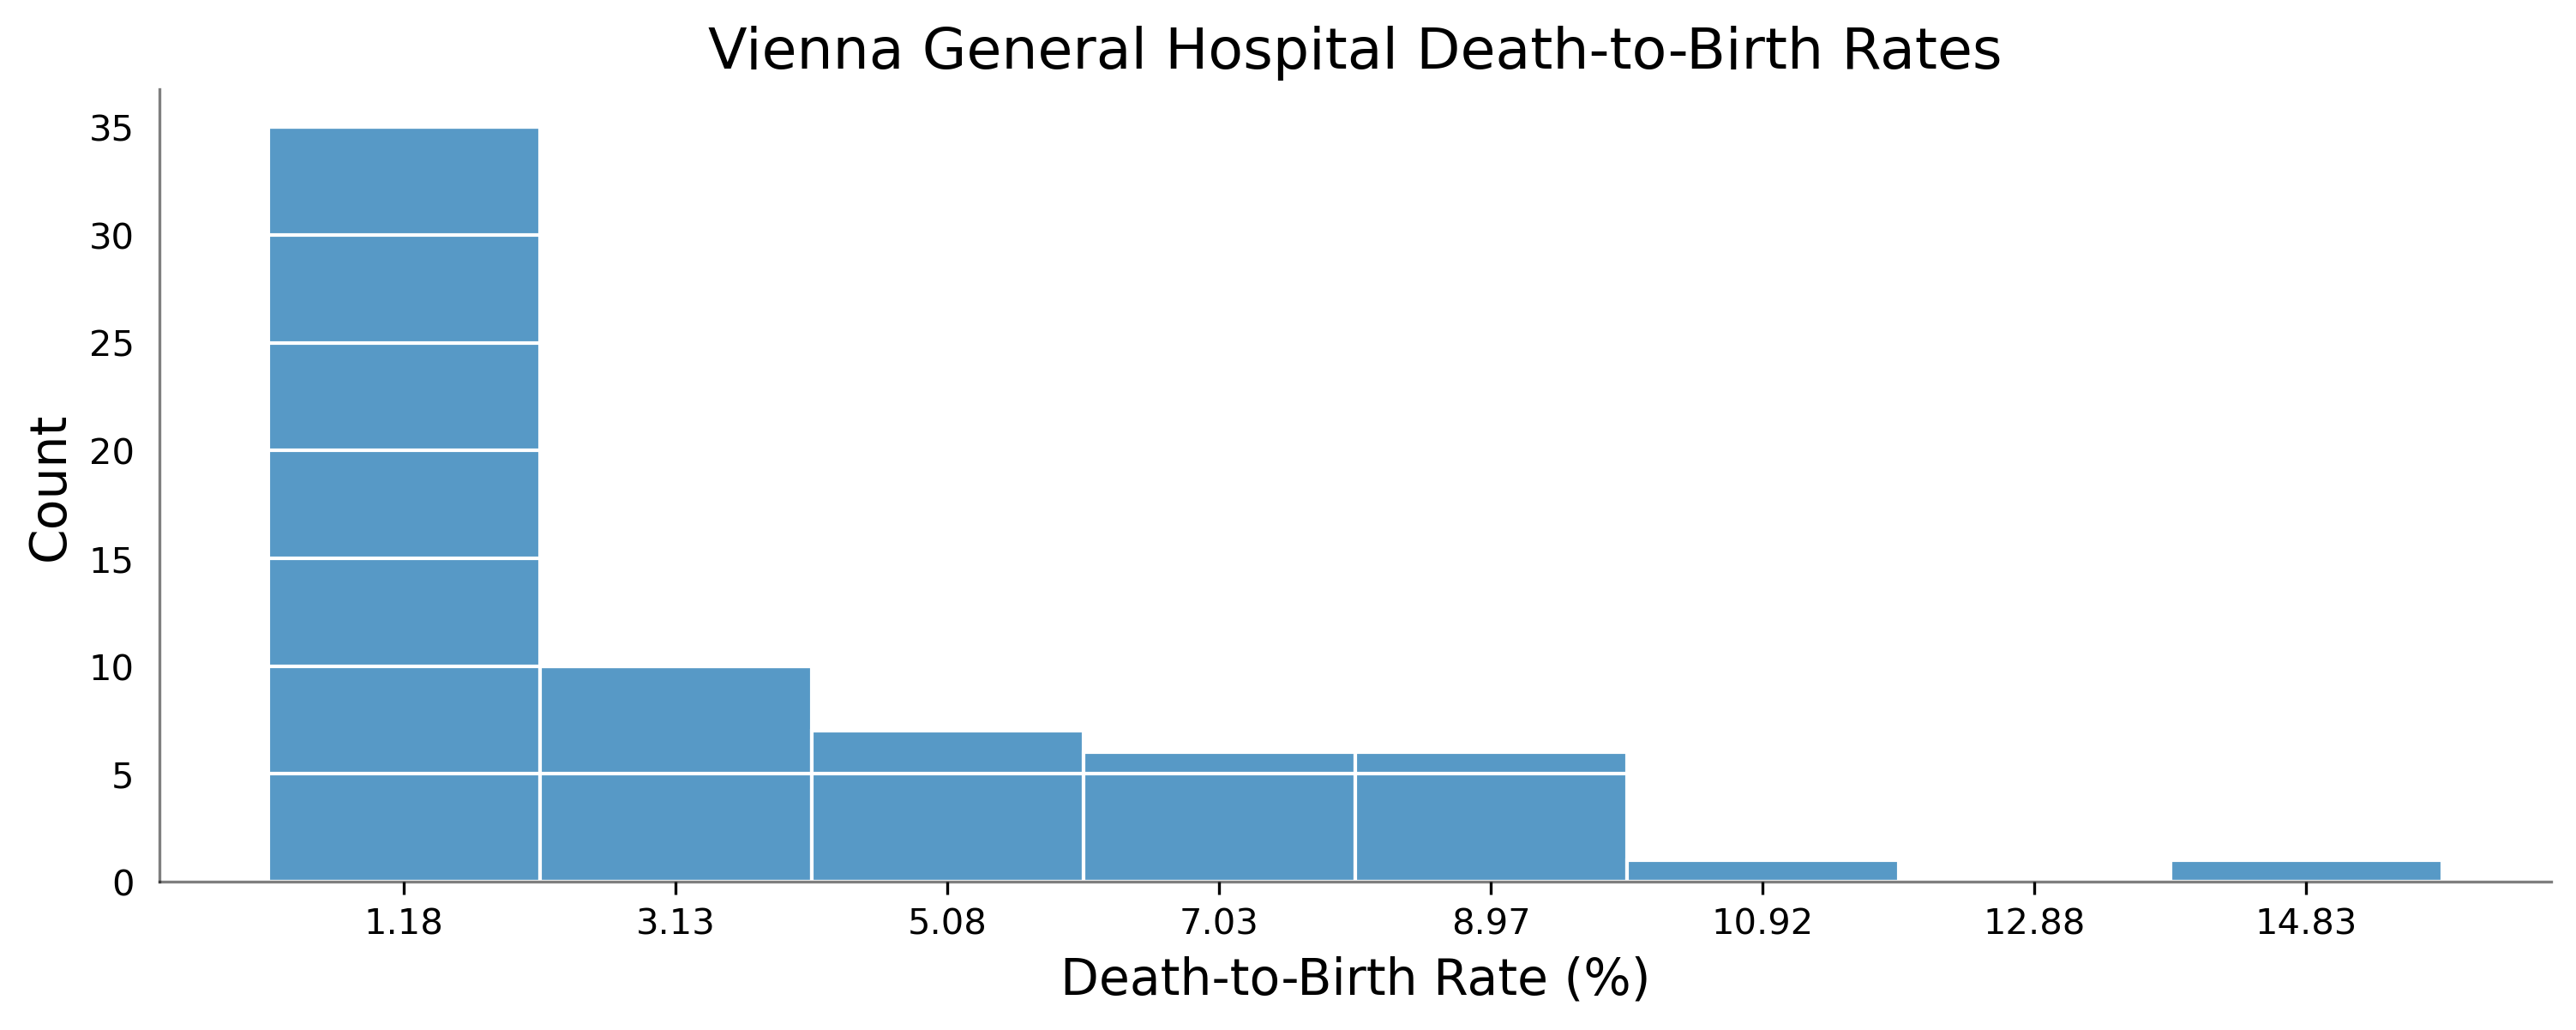

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 4), dpi=300)

# Plot histogram and capture bin edges
histplot = sns.histplot(vg_df['Death-to-Birth Ratio'], bins='auto', edgecolor='white')

# Retrieve bin edges from histogram patches
bin_edges = [patch.get_x() for patch in ax.patches]
if bin_edges:
    bin_edges.append(ax.patches[-1].get_x() + ax.patches[-1].get_width())  # Append last bin edge
    bin_midpoints = [(bin_edges[i] + bin_edges[i+1]) / 2 for i in range(len(bin_edges) - 1)]  # Compute midpoints
    ax.set_xticks(bin_midpoints)  # Set x-ticks at bin midpoints

# Specify x Label and y label
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Add title
plt.title('Vienna General Hospital Death-to-Birth Rates', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Additional formatting
sns.despine()
ax.spines[['left', 'bottom']].set_alpha(0.5)

# Show plot
plt.show()


## Fig 10.2: Grid of histograms with different bins

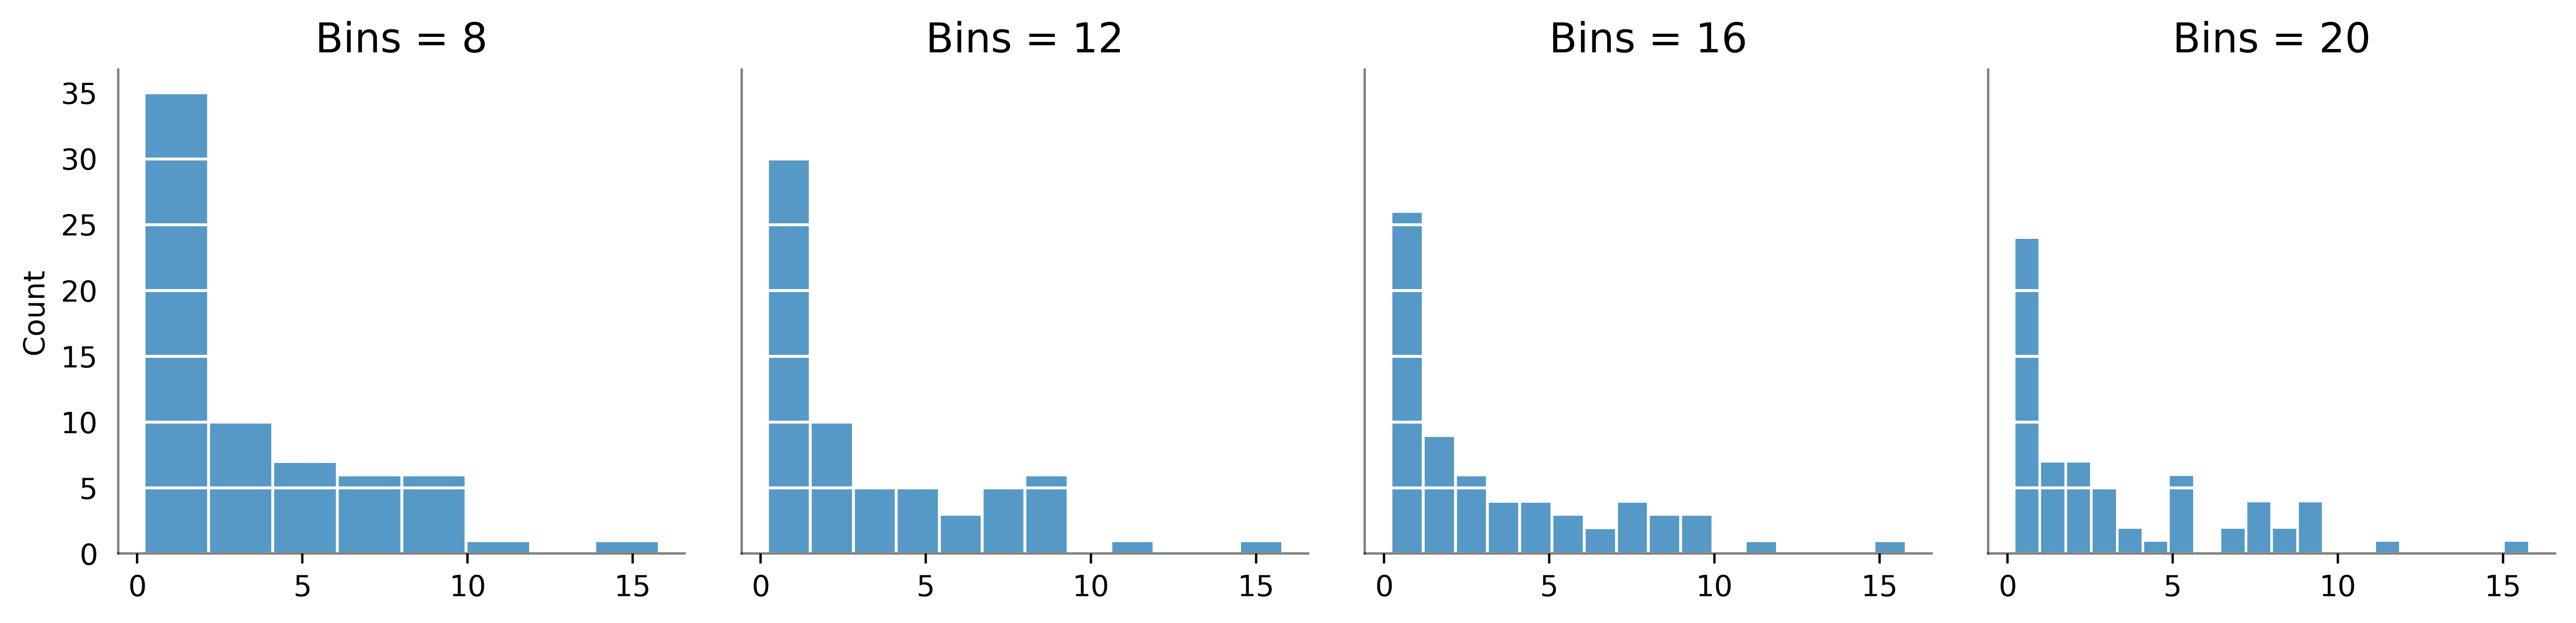

In [9]:
# Create figure and axis
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15,3), 
                         sharey=True, dpi=500)
# Adjust white space of subplots
plt.subplots_adjust(wspace=0.1)

# List of bins for each subplot
bins_list = [8, 12, 16, 20]

# Loop over each subplot and bins value
for i, bins in enumerate(bins_list):
    sns.histplot(vg_df['Death-to-Birth Ratio'], 
                 bins=bins, 
                 ax=axes[i], 
                 edgecolor='white')
    axes[i].set_title(f'Bins = {bins}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].spines[['left','bottom']].set_alpha(0.5)
    # Set the yticks and yticklabels to white
    axes[i].tick_params(axis='y', color='white')
    # Ensure that the y-grid is still visible
    axes[i].yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Despine Figure
sns.despine()

# Show plot
plt.show()

## Update to bin edges

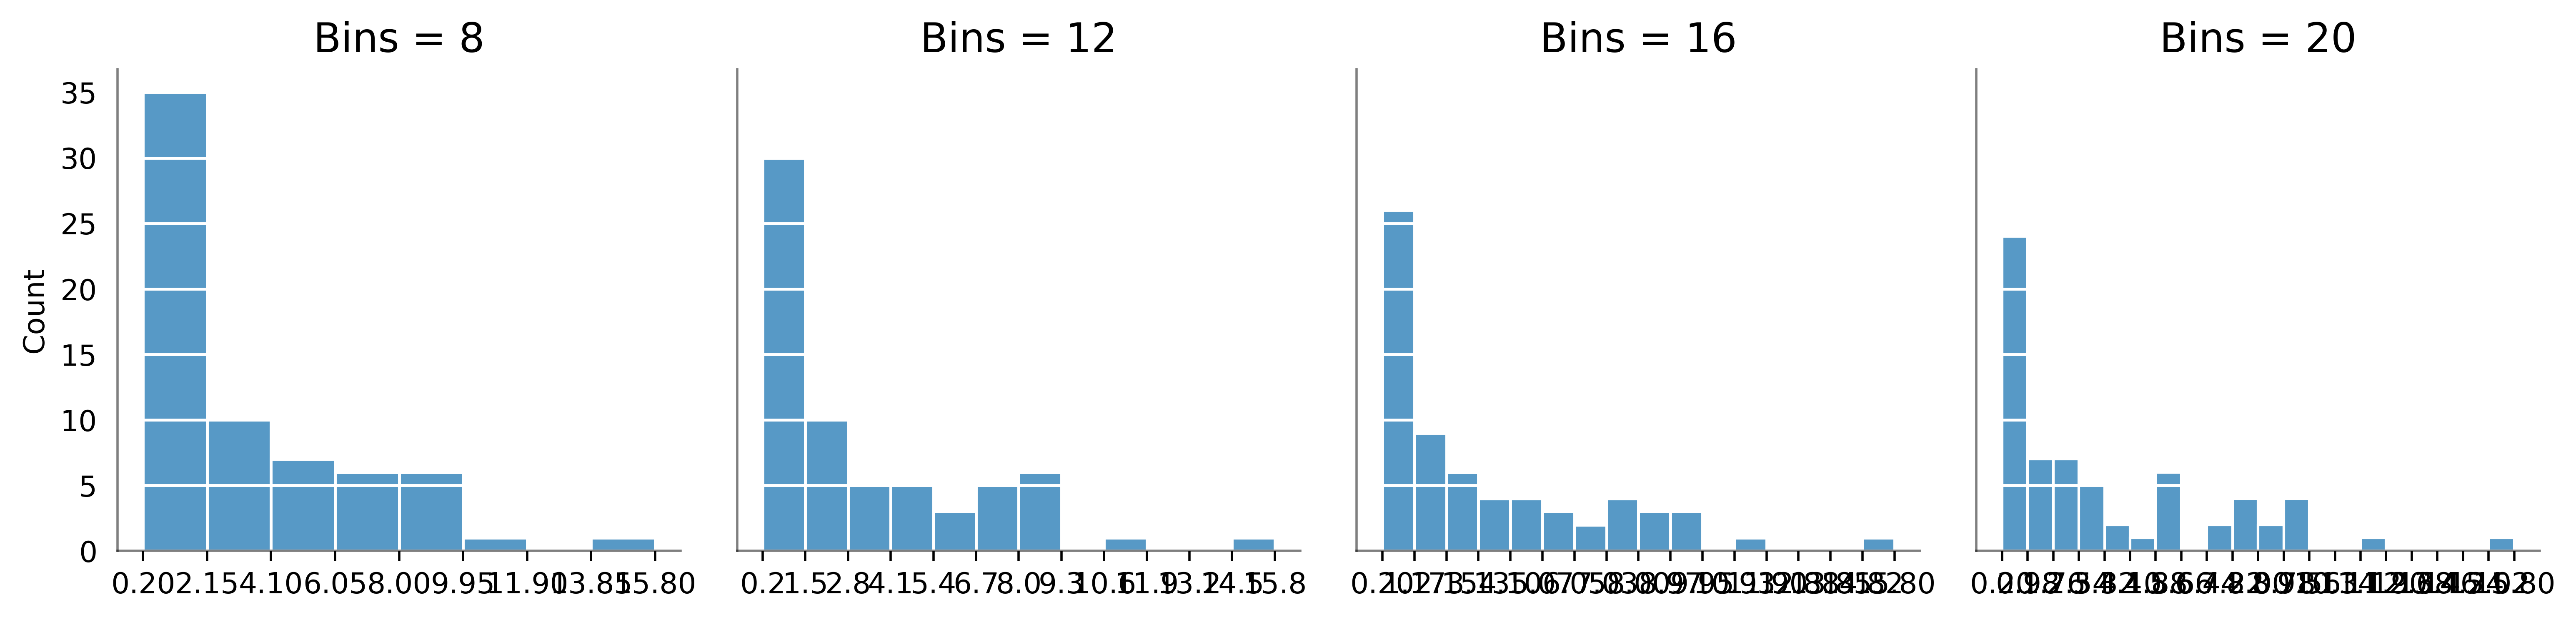

In [10]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3), 
                         sharey=True, dpi=500)

# Adjust white space of subplots
plt.subplots_adjust(wspace=0.1)

# List of bins for each subplot
bins_list = [8, 12, 16, 20]

# Loop over each subplot and bins value
for i, bins in enumerate(bins_list):
    # Plot histogram
    histplot = sns.histplot(vg_df['Death-to-Birth Ratio'], 
                            bins=bins, 
                            ax=axes[i], 
                            edgecolor='white')

    # Extract bin edges dynamically
    bin_edges = [patch.get_x() for patch in axes[i].patches]
    if bin_edges:
        # Include the rightmost edge of the last bin
        bin_edges.append(axes[i].patches[-1].get_x() + axes[i].patches[-1].get_width())
        axes[i].set_xticks(bin_edges)  # Set xticks to match bin edges

    # Formatting
    axes[i].set_title(f'Bins = {bins}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].spines[['left', 'bottom']].set_alpha(0.5)
    axes[i].tick_params(axis='y', color='white')  # Set yticks color
    axes[i].yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Despine Figure
sns.despine()

# Show plot
plt.show()


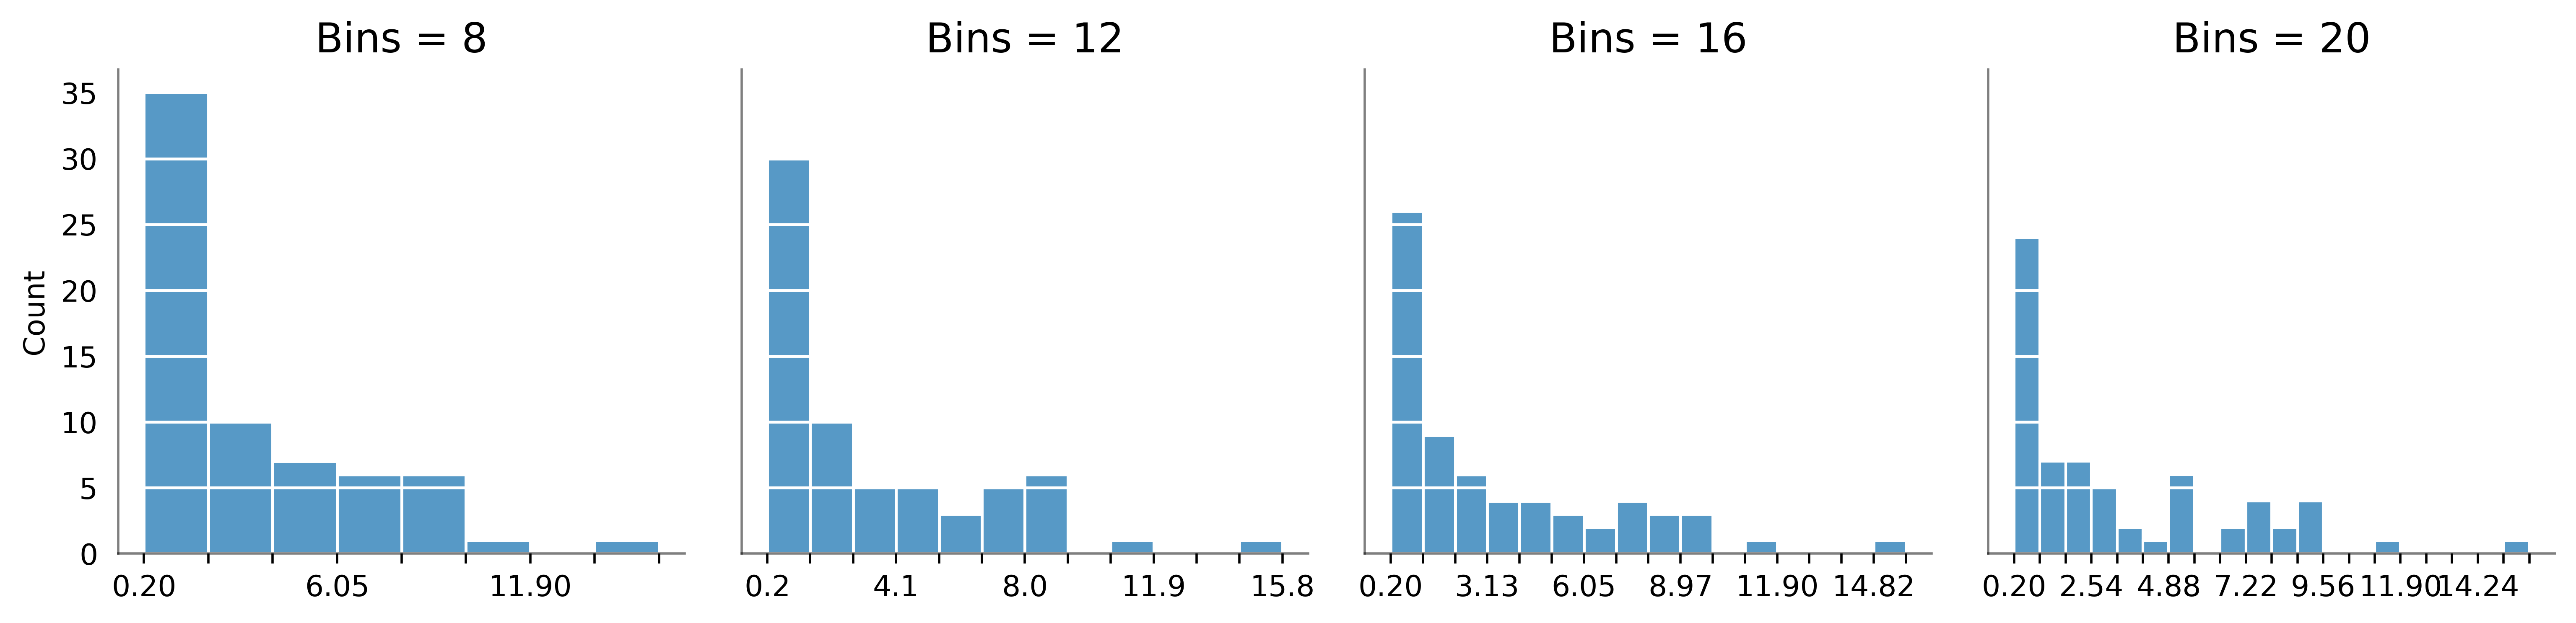

In [11]:
# Create figure and axes
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(15, 3), 
                         sharey=True, dpi=500)

# Adjust white space of subplots
plt.subplots_adjust(wspace=0.1)

# List of bins for each subplot
bins_list = [8, 12, 16, 20]

# Loop over each subplot and bins value
for i, bins in enumerate(bins_list):
    # Plot histogram
    histplot = sns.histplot(vg_df['Death-to-Birth Ratio'], 
                            bins=bins, 
                            ax=axes[i], 
                            edgecolor='white')

    # Extract bin edges dynamically
    bin_edges = [patch.get_x() for patch in axes[i].patches]
    if bin_edges:
        # Include the rightmost edge of the last bin
        bin_edges.append(axes[i].patches[-1].get_x() + axes[i].patches[-1].get_width())
        axes[i].set_xticks(bin_edges)  # Set xticks to match bin edges
        
        # Hide every other xtick label
        xtick_labels = [label.get_text() for label in axes[i].get_xticklabels()]
        for j, label in enumerate(axes[i].get_xticklabels()):
            if j % 3 != 0:  # Hide every second label
                label.set_visible(False)

    # Formatting
    axes[i].set_title(f'Bins = {bins}', fontsize=14)
    axes[i].set_xlabel('')
    axes[i].spines[['left', 'bottom']].set_alpha(0.5)
    axes[i].tick_params(axis='y', color='white')  # Set yticks color
    axes[i].yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Despine Figure
sns.despine()

# Show plot
plt.show()


## Fig 10.5: A helpful histogram

Determining the appropriate number of bins for a stem and leaf plot, as outliend by John Tukey, is achieved using a stem and leaf plot. The Python package `stemgraphic` is used to determine the correct bins for figure 10.5. 

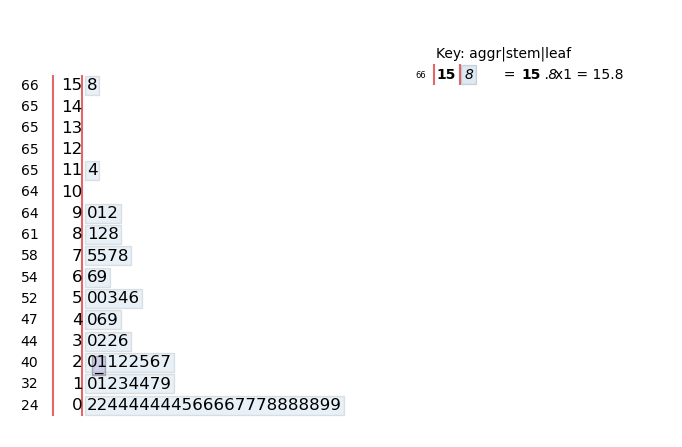

In [12]:
import stemgraphic

# Create stem and leaf plot of Vienna General ratios
vienna_stem_leaf = stemgraphic.stem_graphic(vg_df['Death-to-Birth Ratio'])

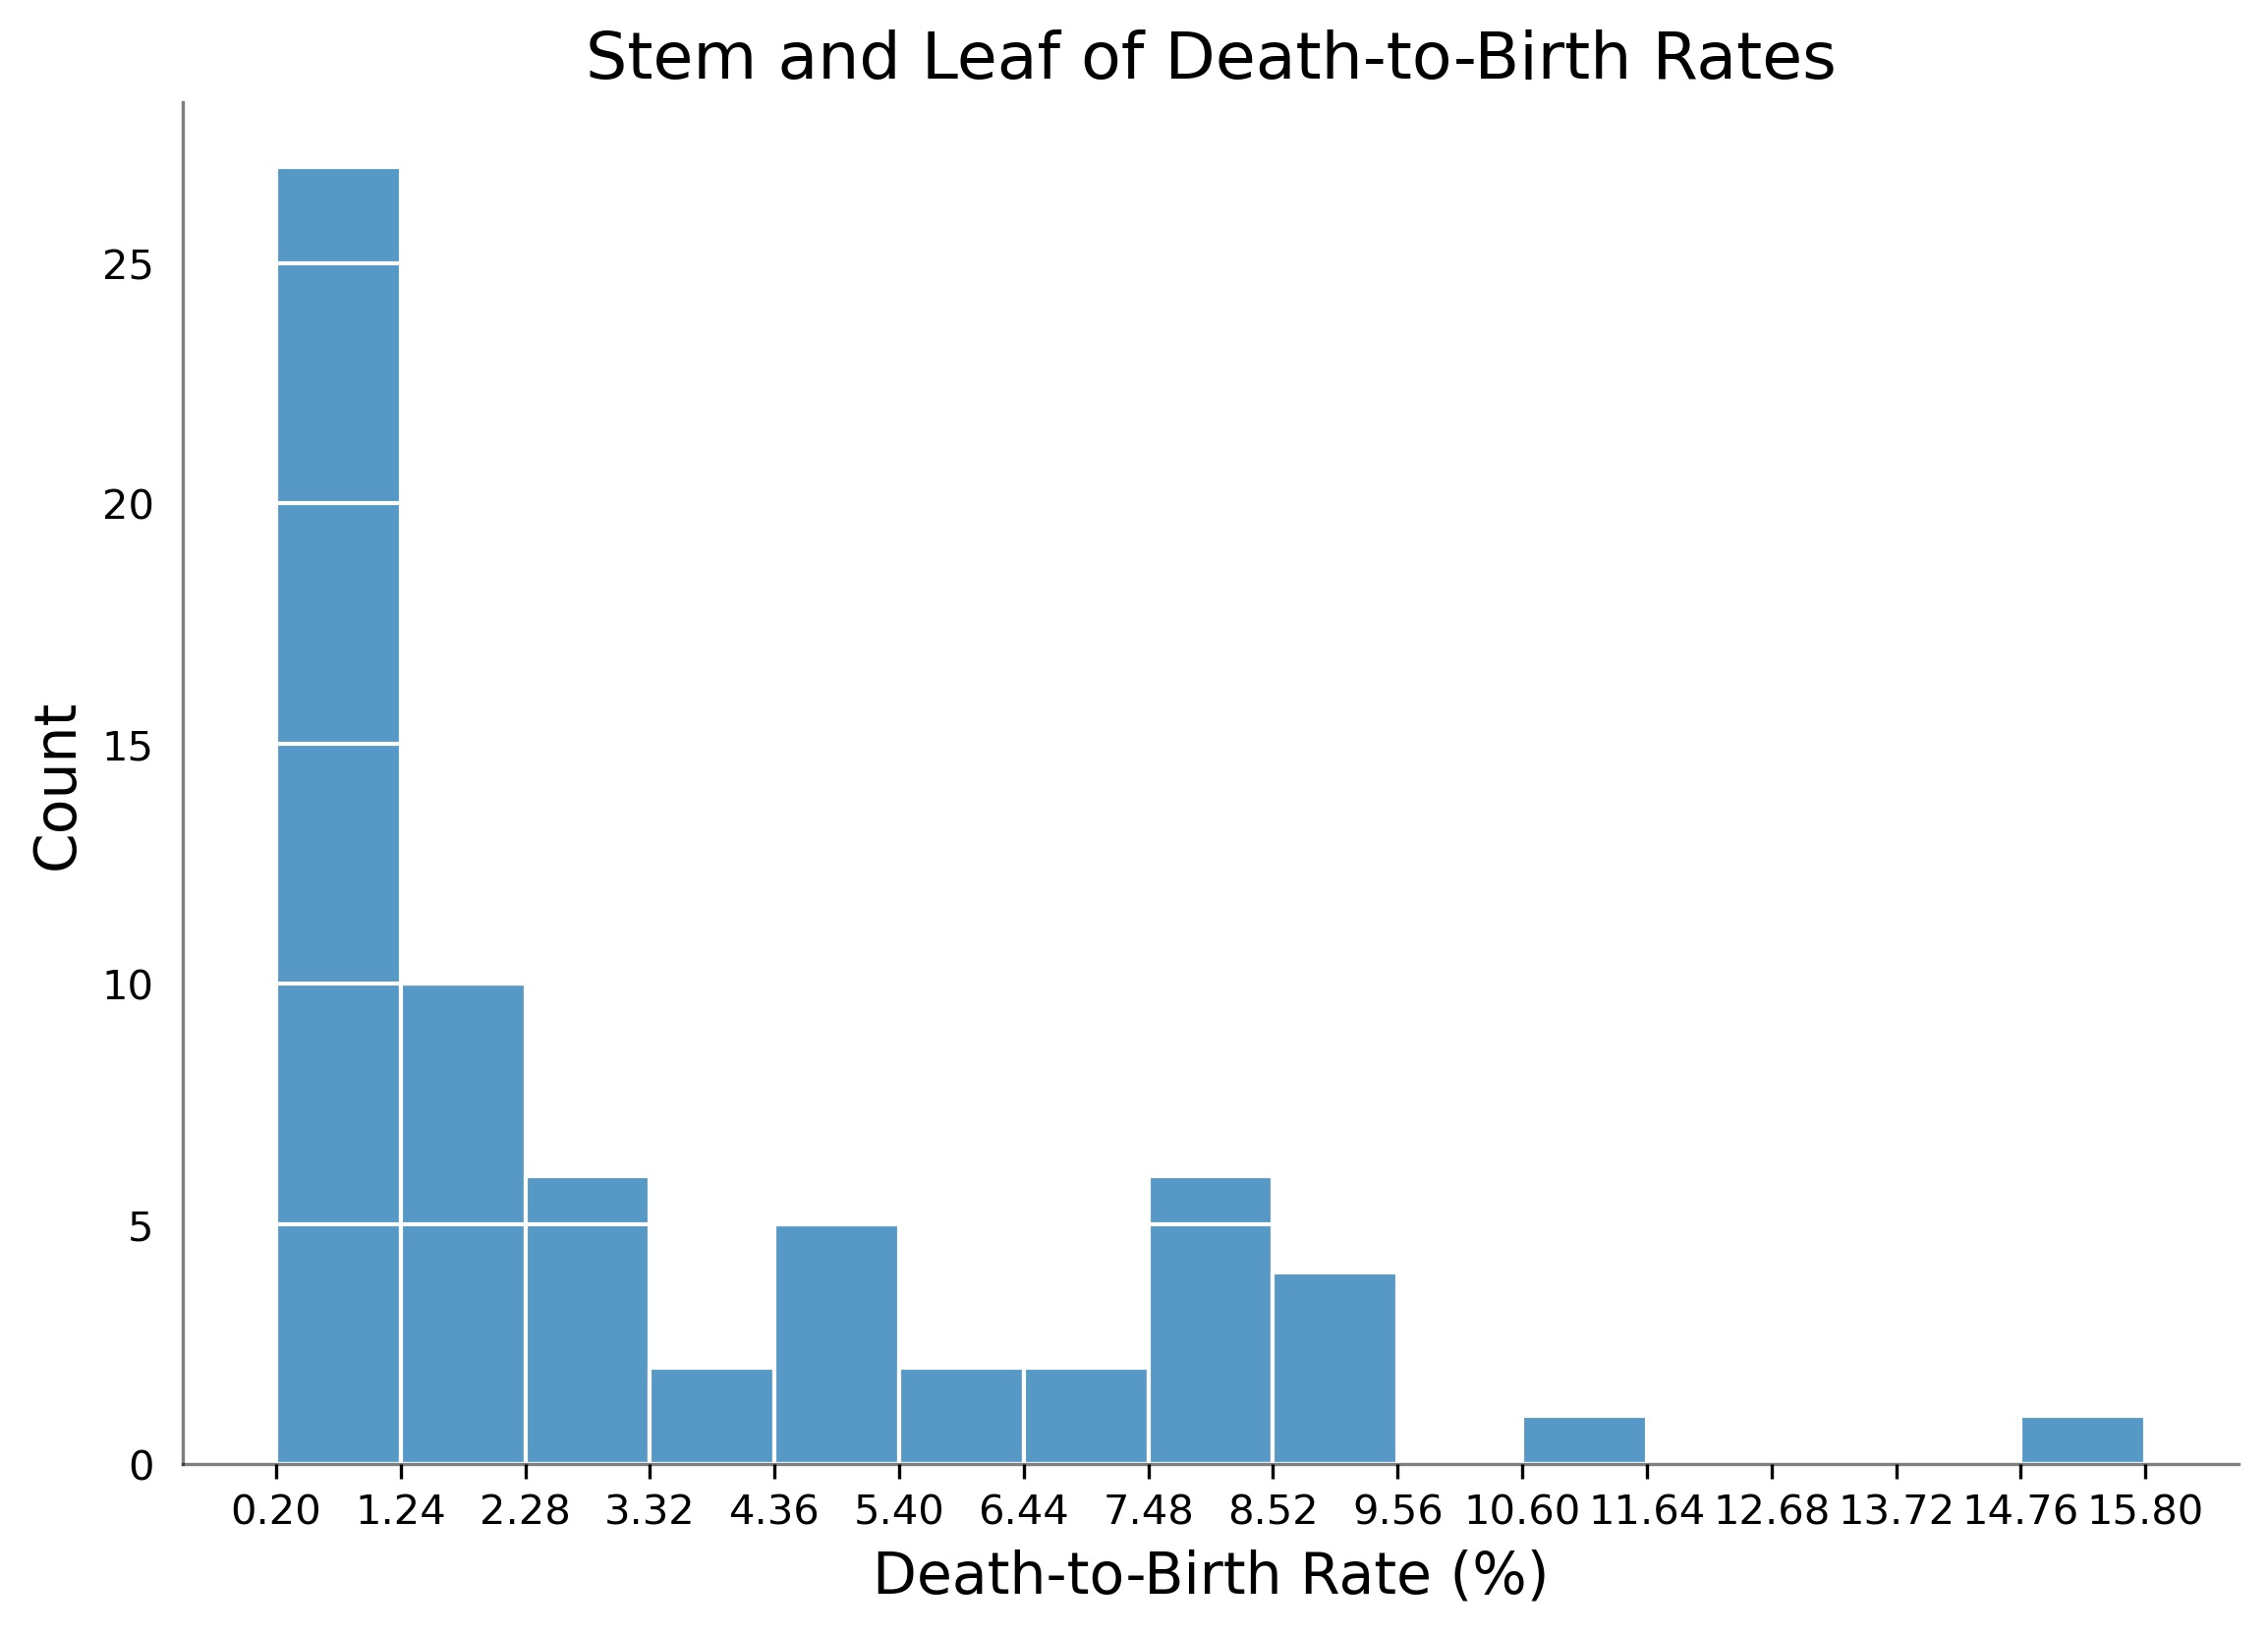

In [27]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(9,6), dpi=300)

# Plot data in histogram with bins=15
histplot = sns.histplot(vg_df['Death-to-Birth Ratio'], 
             bins=15, 
             edgecolor='white')

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Formatting
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
# plt.title('Histogram of Death-to-Birth Rates', fontsize=16)
plt.title('Stem and Leaf of Death-to-Birth Rates', fontsize=16)
# plt.title('Vienna General Hospital Death-to-Birth Rates Histogram', fontsize=16)
# plt.title('Vienna General Hospital Death-to-Birth Rates Stem and Leaf', fontsize=16)

# Despine 
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)

# Show plot
plt.show()

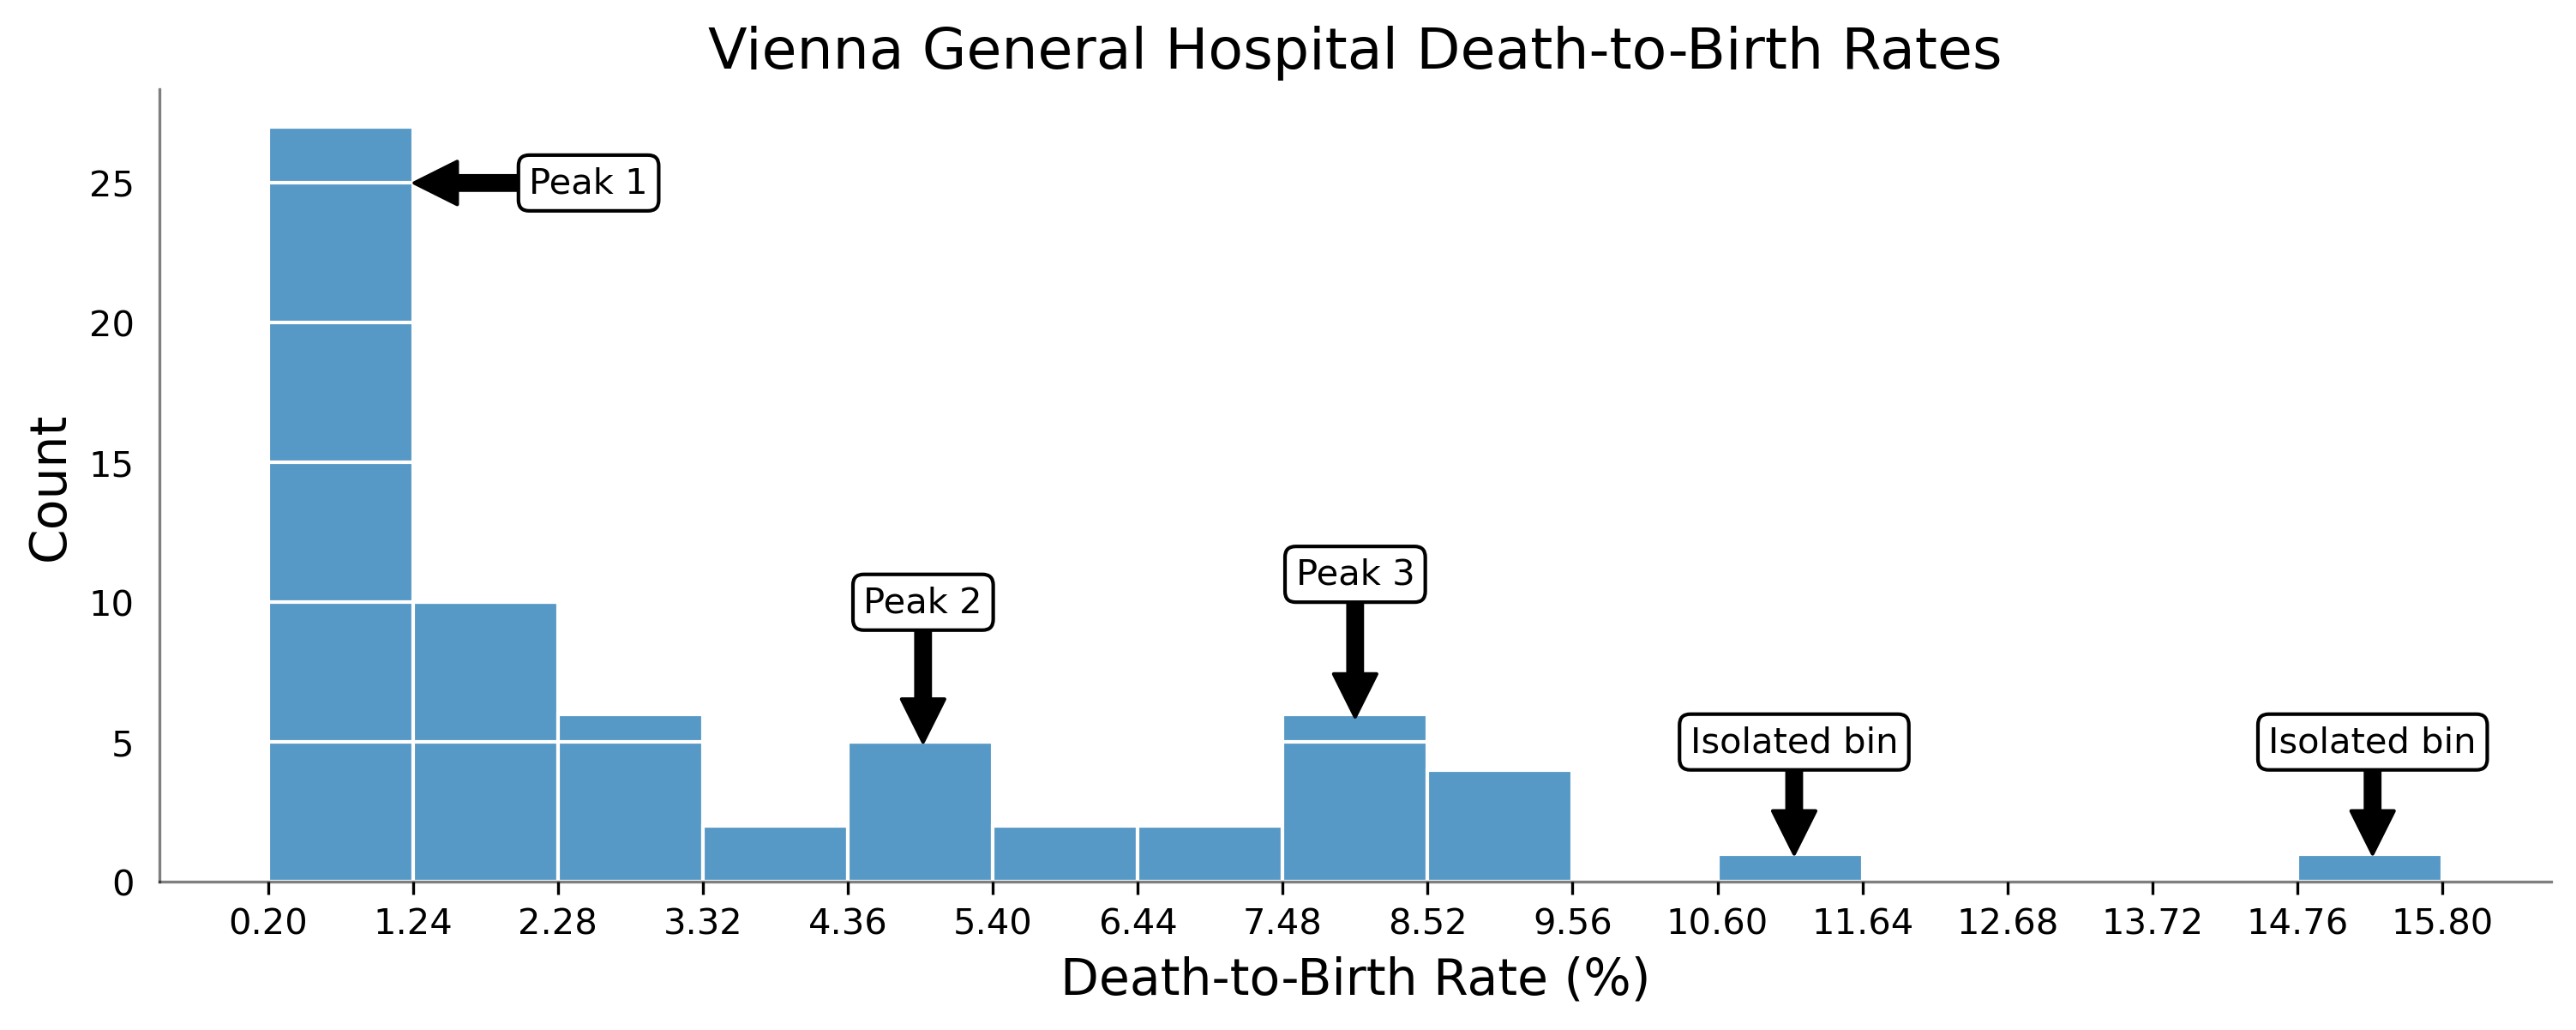

In [14]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histogram with bins=15
histplot = sns.histplot(vg_df['Death-to-Birth Ratio'], 
             bins=15, 
             edgecolor='white')

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Define details for annotations (text, xy-coordinates, xytext-coordinates)
annotations = [
    ('Peak 1', (1.25, 25), (2.5, 25)),
    ('Peak 2', (4.9, 5), (4.9, 10)),
    ('Peak 3', (8, 5.9), (8, 11)),
    ('Isolated bin', (11.15, 1), (11.15, 5)),
    ('Isolated bin', (15.3, 1), (15.3, 5))
]

# Add annotations using a loop
for text, xy, xytext in annotations:
    ax.annotate(text, xy=xy, xytext=xytext,
                ha='center', va='center', fontsize=10,
                bbox=dict(facecolor='white', boxstyle='round'),
                arrowprops=dict(facecolor='black'))

# Formatting
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Vienna General Hospital Death-to-Birth Rates', fontsize=16)

# Despine 
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)

# Show plot
plt.show()

## Fig 10.6: Histogram of ratios at Dublin Maternity

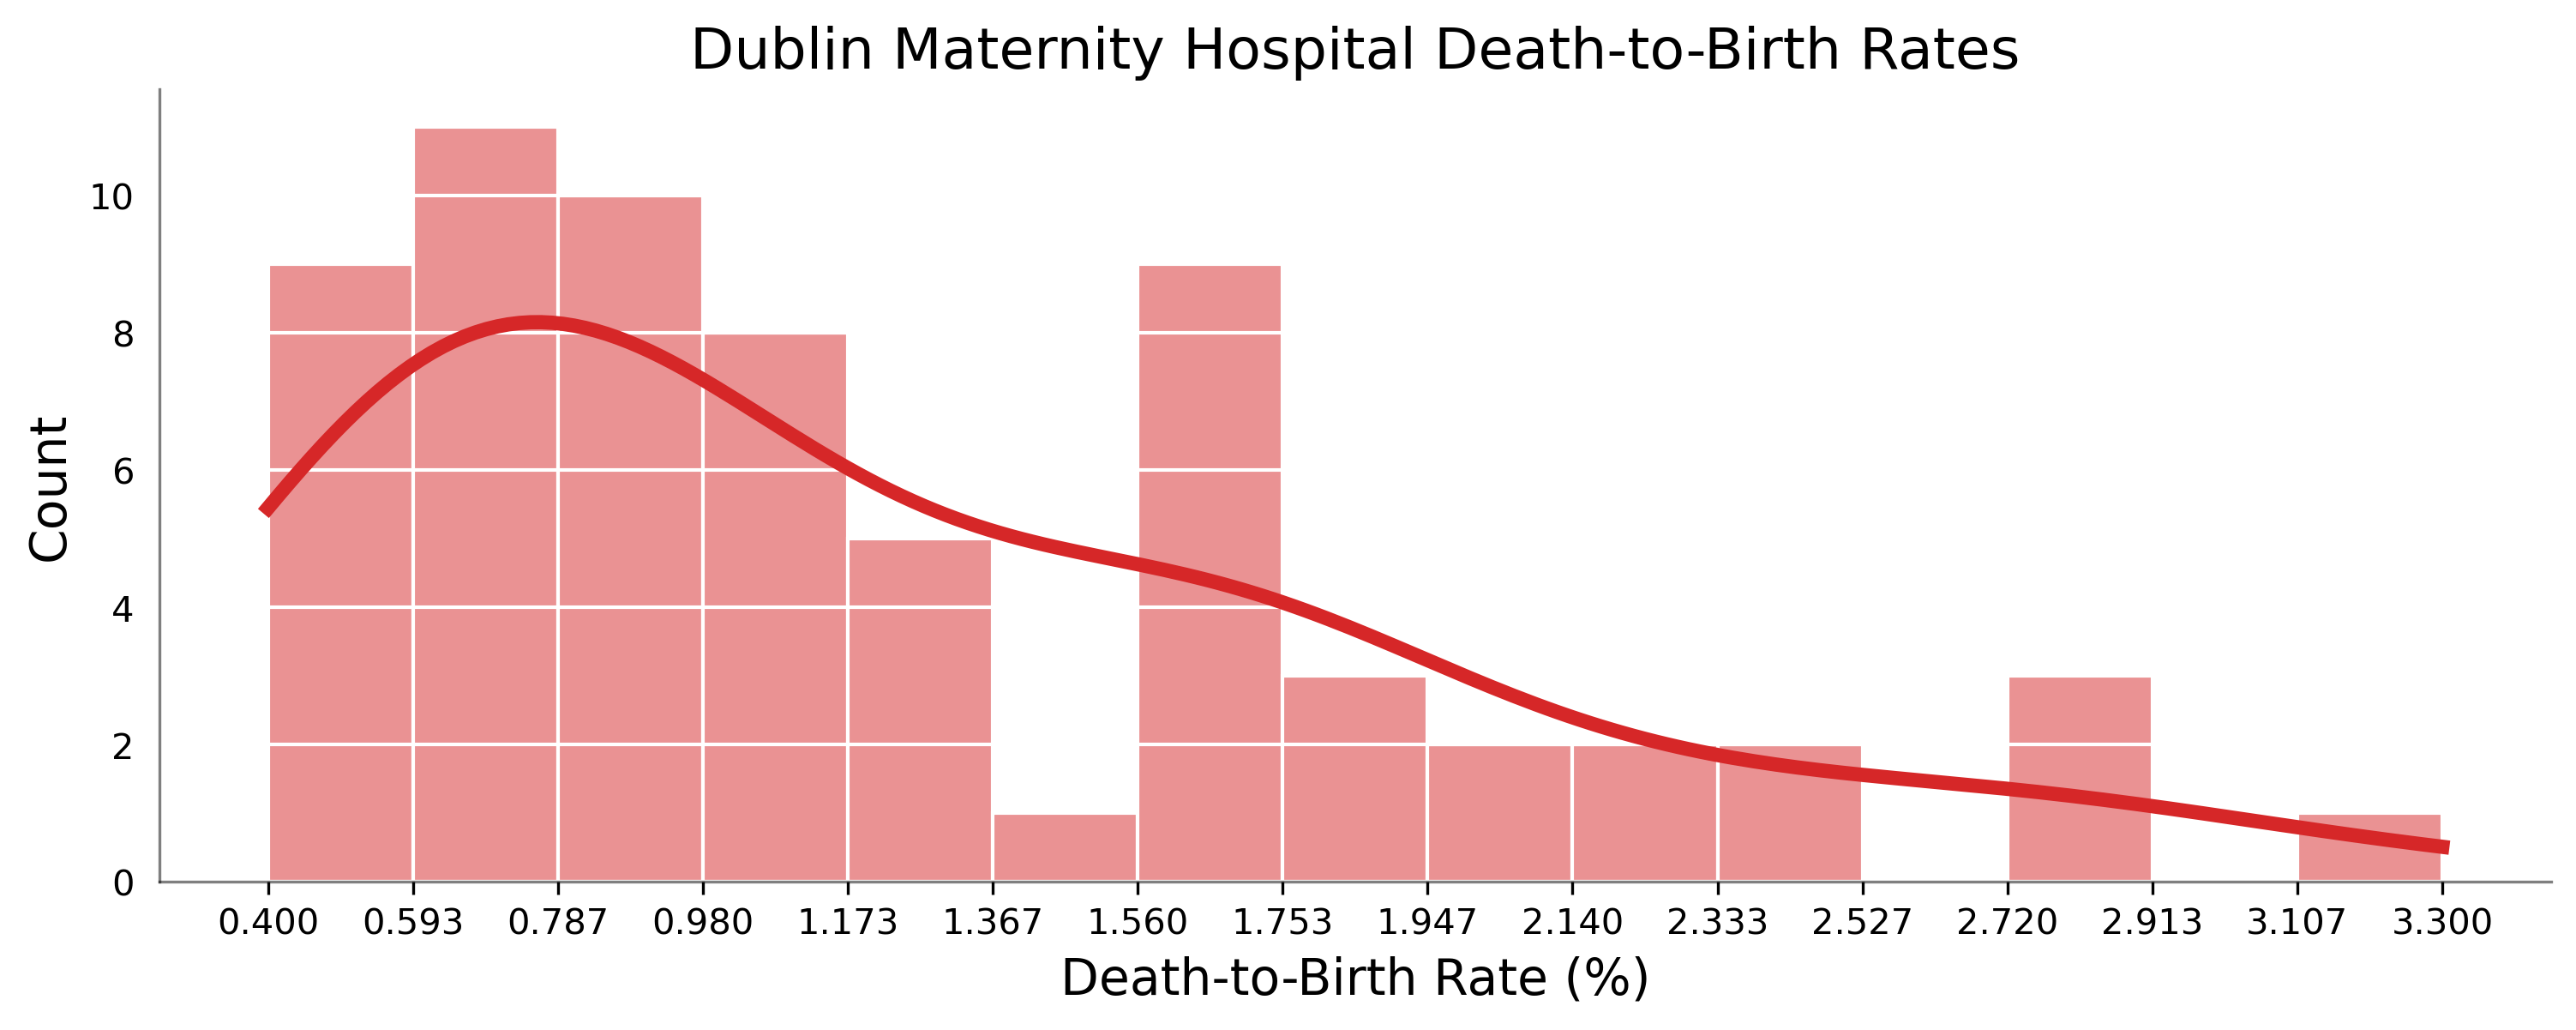

In [15]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histogram
histplot = sns.histplot(dg_df['Death-to-Birth Ratio'], 
             bins=15, 
             color='tab:red', 
             edgecolor='white',
             kde=True, 
             legend=True, 
             line_kws={'color': 'red', 'linewidth': 4})

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
plt.ylabel('Count', fontsize=14)
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.title('Dublin Maternity Hospital Death-to-Birth Rates', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)

# Show plot
plt.show()

## Fig 10.7: Comparison of histograms from both hospitals

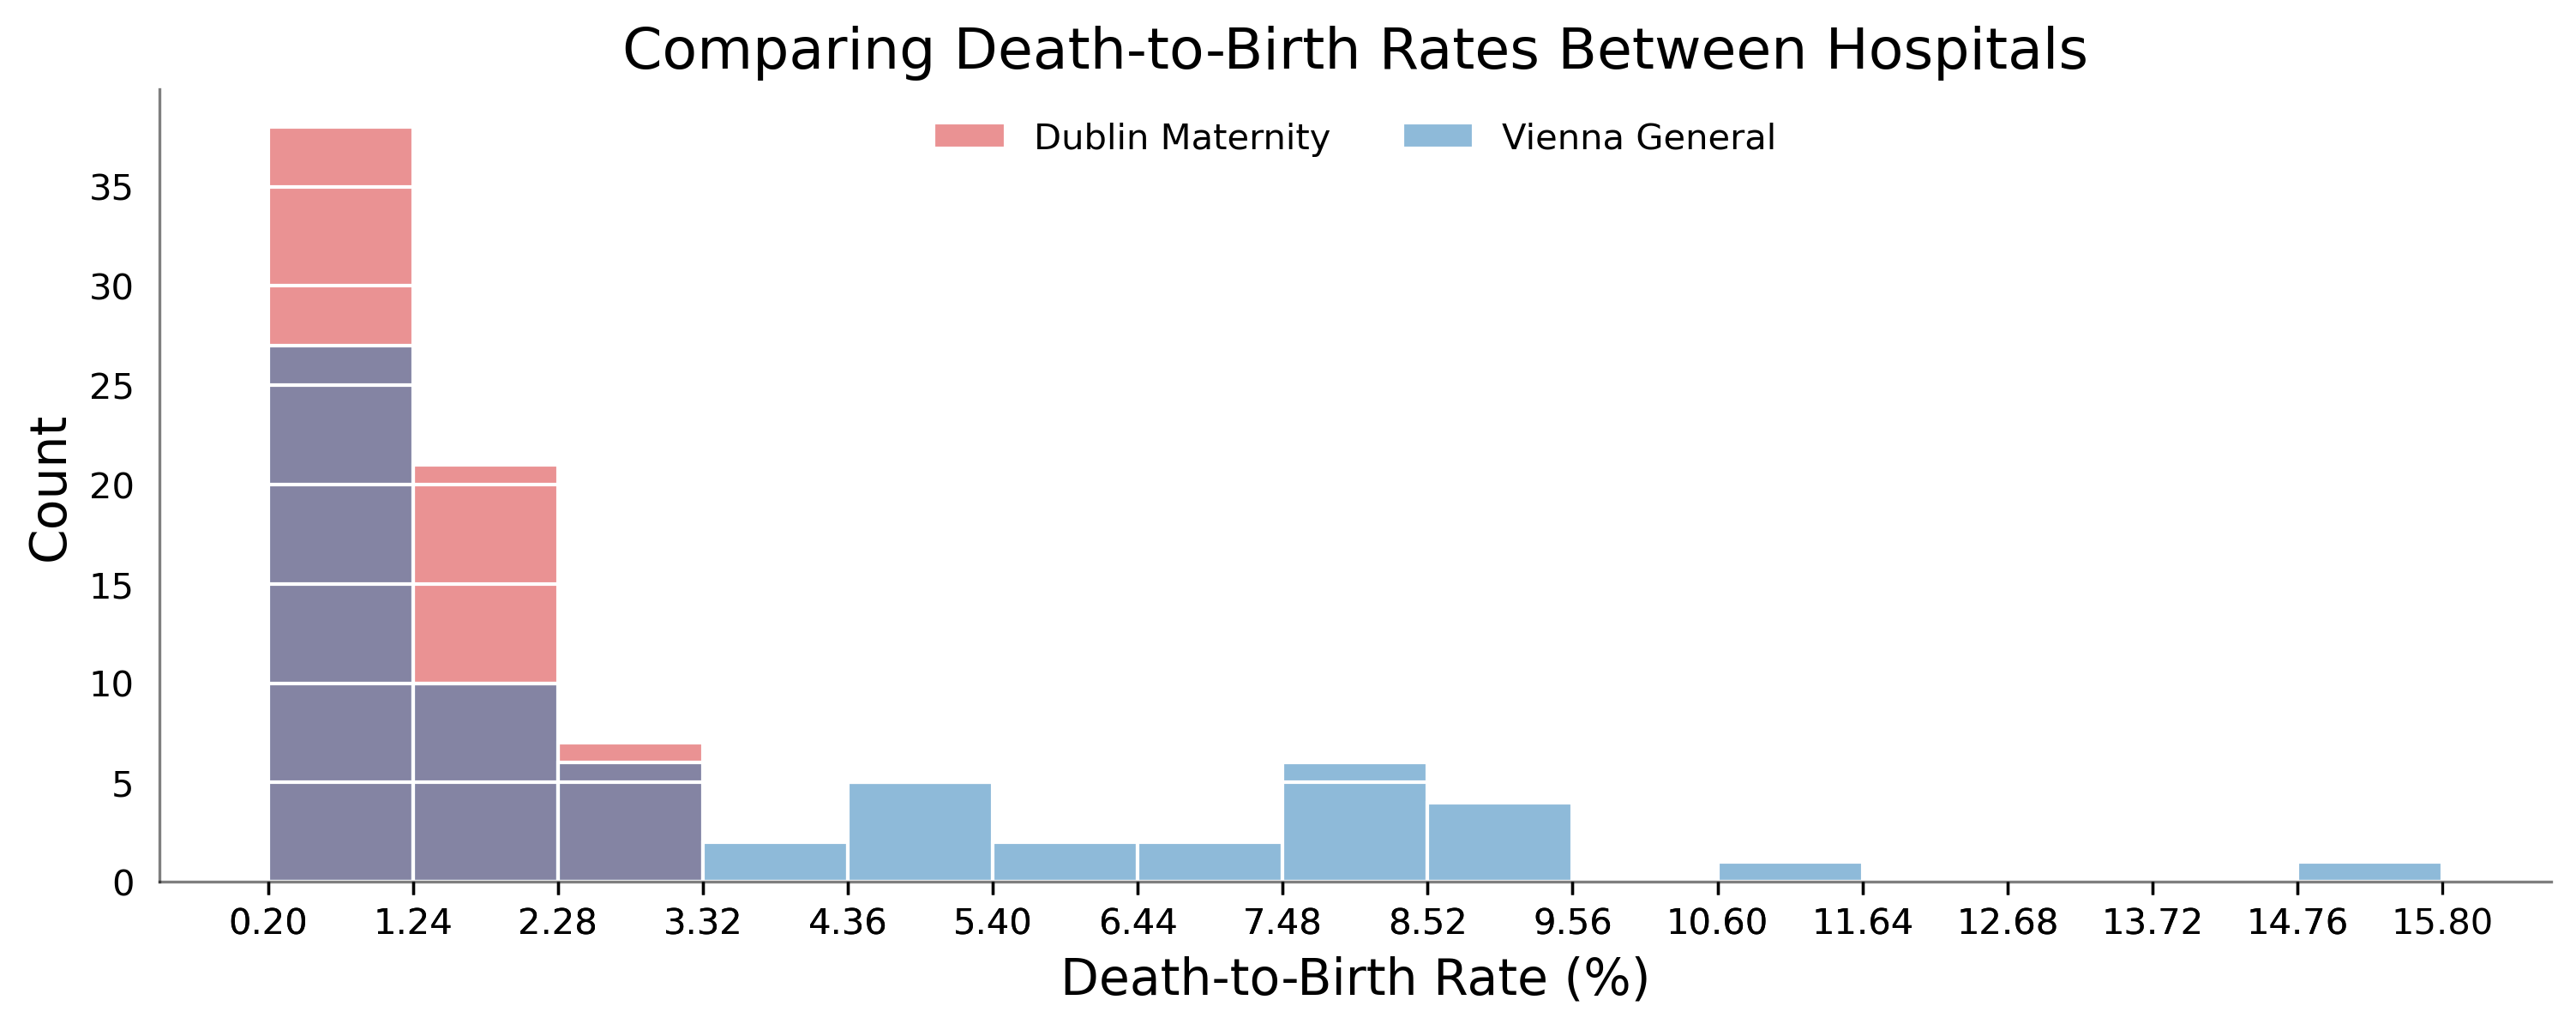

In [16]:
# Plot data from Vienna General in histogram
fig, ax = plt.subplots(figsize=(12,4), dpi=300)

# Plot data in histplot
histplot = sns.histplot(df, 
             x='Death-to-Birth Ratio', 
             hue='Hospital', 
             bins=15, 
             edgecolor='white',
             alpha=0.5, 
             palette=['tab:blue','tab:red'],
             multiple='layer')

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Modify the legend
plt.legend(title="", 
           labels=['Dublin Maternity', 'Vienna General'], 
           loc='upper center',
           ncol=2,
           frameon=False)

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
plt.ylabel('Count', fontsize=14)
plt.xlabel('Death-to-Birth Rate (%)',fontsize=14)
plt.title('Comparing Death-to-Birth Rates Between Hospitals', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)

# Show plot
plt.show()

## Fig 10.8: Dublin histogram without kde

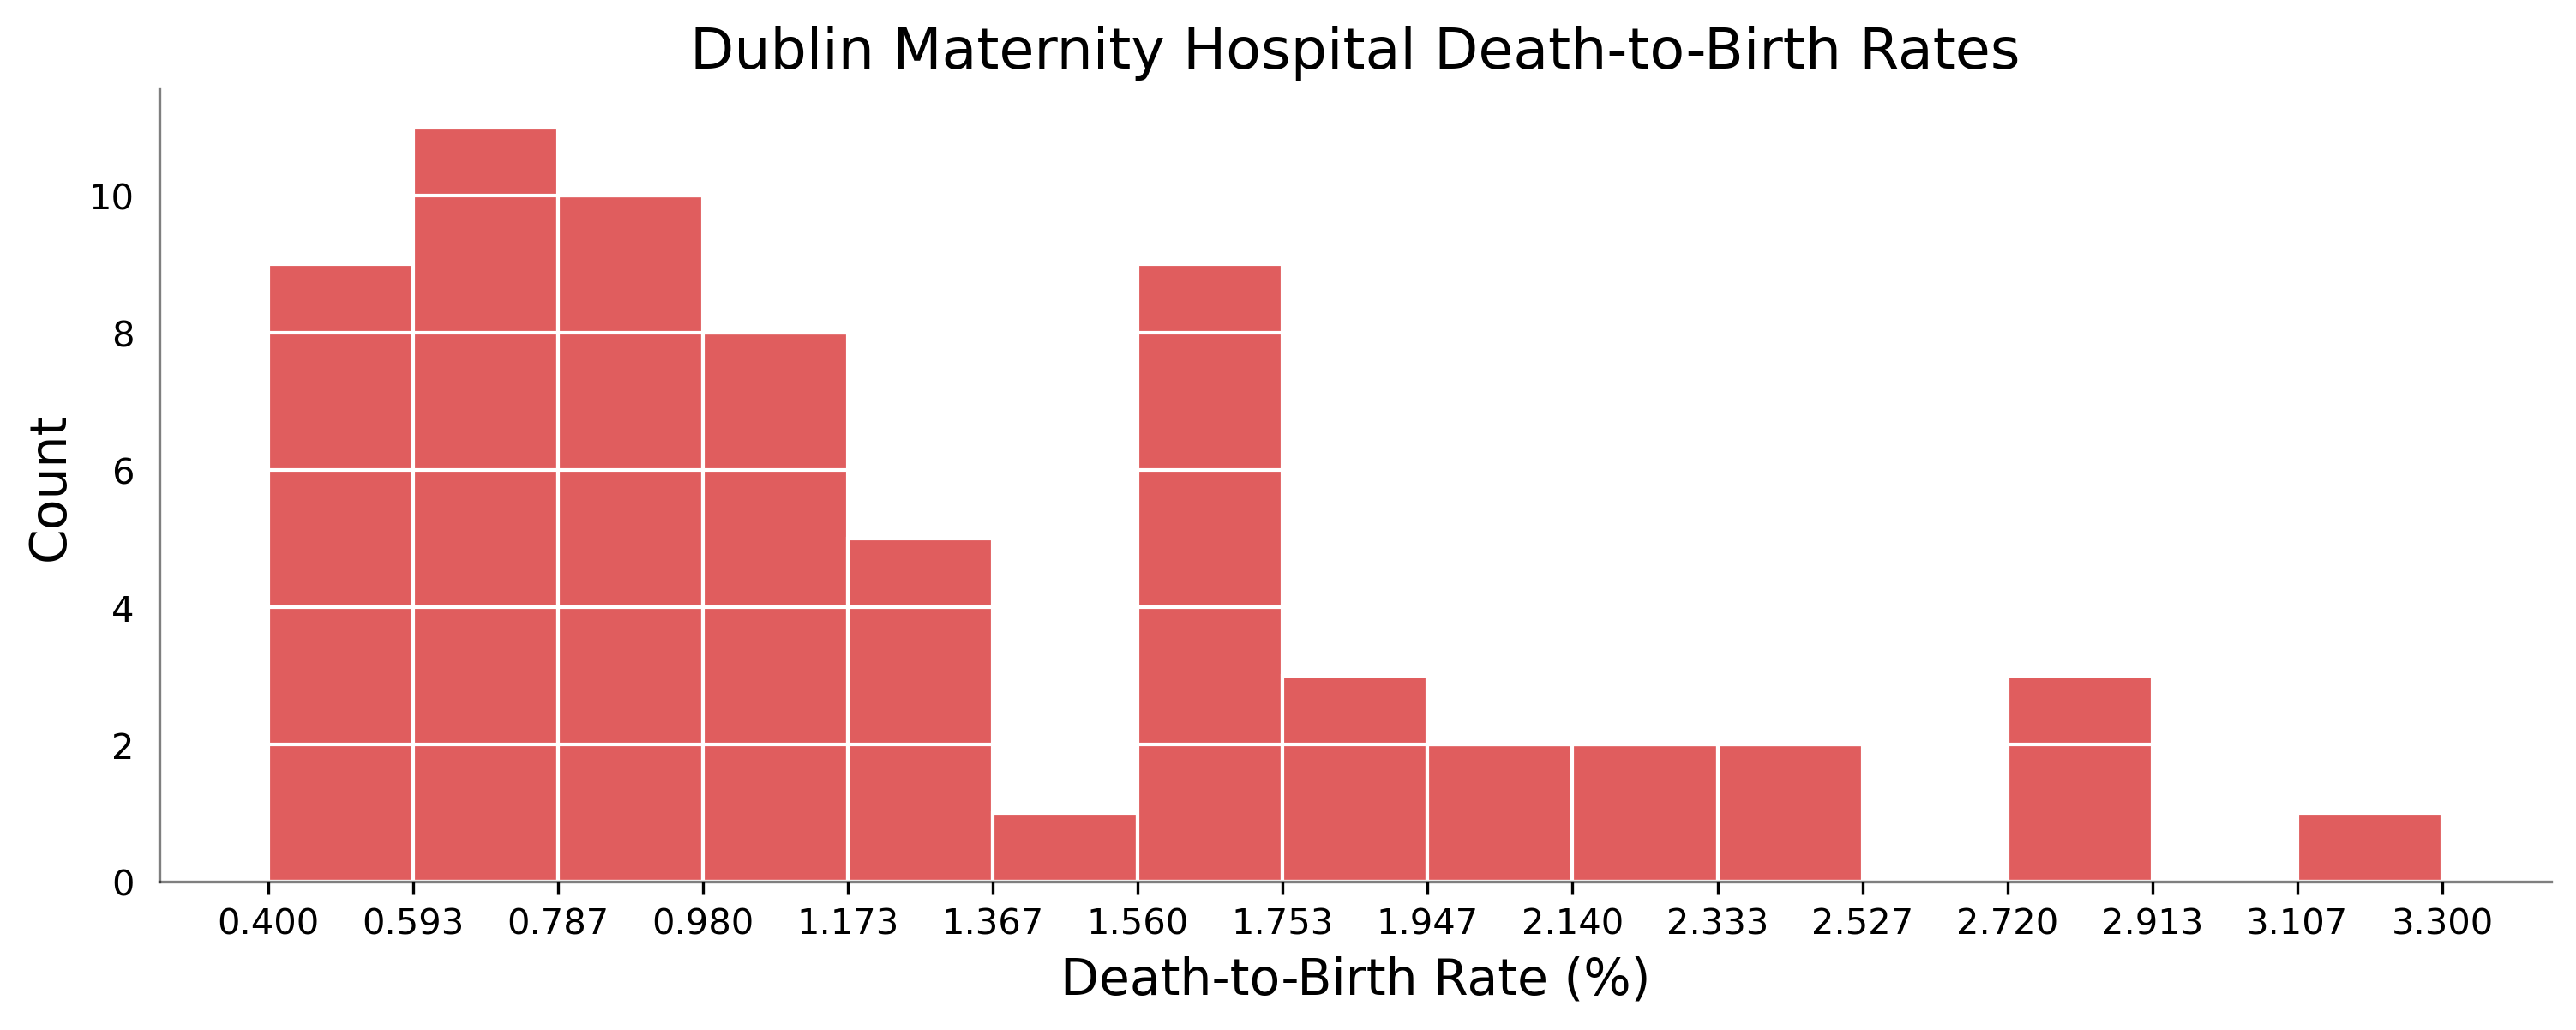

In [17]:
# Plot data from Vienna General in histogram
fig, ax = plt.subplots(figsize=(12,4), dpi=300)
# sns.histplot(dg_df['Rate (%)'], bins=15, color='tab:red', kde=True, legend=True)

# Plot data in histogram
histplot = sns.histplot(dg_df['Death-to-Birth Ratio'], 
             bins=15, 
             color='tab:red', 
             edgecolor='white') 

# Get bin edges from the plotted histogram
bin_edges = histplot.patches  # Access bars to infer bin edges

# Extract bin positions
if bin_edges:
    bins = np.array([patch.get_x() for patch in bin_edges] + [bin_edges[-1].get_x() + bin_edges[-1].get_width()])
    plt.xticks(bins)  # Set xticks to match bin edges

# Despine
sns.despine()
ax.spines[['left','bottom']].set_alpha(0.5)

# Additional formatting
plt.ylabel('Count', fontsize=14)
plt.xlabel('Death-to-Birth Rate (%)', fontsize=14)
plt.title('Dublin Maternity Hospital Death-to-Birth Rates', fontsize=16)

# Set the yticks and yticklabels to white
ax.tick_params(axis='y', color='white')

# Ensure that the y-grid is still visible
ax.yaxis.grid(True, color='white', linestyle='-', linewidth=1, zorder=1)  # Re-enable the y-grid

# Show plot
plt.show()